**`BALLA_LOUISE_ERIKA_VIRGINIE`**, `17J2698` et `virginie.balla@facsciences-uy1.cm` 

Department of Physics - Faculty of Science - University of Yaoundé I

`PNR`

`10-07-2023`

Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

Cette molécule présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. A partir de site de [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498), donner, **dans votre cahier de composition**, sa formule moléculaire et son poids moléculaire.
2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 
3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre de liaisons donneurs d'hydrogènes  et nombre de liaisons accepteurs d'hydrogènes. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**
4. Utiliser `rdkit.Chem.AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire, à partir de `mol` (molécule rdkit) de la question 2. dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN. 
   
   ```python
    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'votre_nom_4CzIPN.xyz')
    ```

5. Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.
6. Utiliser `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

    et par la méthode `CzIPN_mol.build().get_enuc()`, obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.
7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [2]:
!pip install rdkit

  Using cached rdkit-2023.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.7 MB)

[notice] A new release of pip available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import rdkit
import pyscf
print(rdkit.__version__)
print(pyscf.__version__)

2023.03.2
2.1.1


In [12]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import AllChem


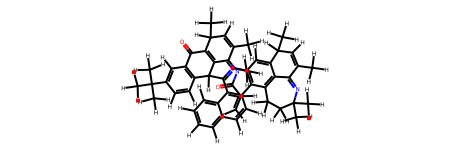

In [17]:
smi = 'CC(C)(C)C1=CC2=C(C=C1)C(C3=C(C2=O)C(C=C(C3=NC(=O)C=C)C)C)C(C4=C5C=CC=CC5=CC=C4C6=C(C7=C(C=C6)C(C=C(C7=N8)C)C)CCC8(C)C)=NC'
mol = MolFromSmiles(smi) # Convert smiles to molecule
mol = AllChem.AddHs(mol)
mol

In [36]:
from rdkit.Chem import Descriptors
import pandas as pd


In [37]:
def descriptors(mol):
    mw = Descriptors.MolWt(mol)
    mw_no_h = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    tpsa = Descriptors.TPSA(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    return [mw, mw_no_h, logp ,tpsa ,hbd, hba]

In [38]:
df = pd.DataFrame({'Poids moléculaire': [mw],
                   'Poids moléculaire (sans H)': [mw_no_h],
                   'LogP': [logp],
                   'TPSA': [tpsa],
                   'Nombre de liaisons donneurs d\'hydrogènes': [hbd],
                   'Nombre de liaisons accepteurs d\'hydrogènes': [hba]})

# Affichage du dataframe
print(df)

Traceback (most recent call last):
  Cell In[38], line 1
    df = pd.DataFrame({'Poids moléculaire': [mw],
NameError: name 'mw' is not defined

Use %tb to get the full traceback.


In [28]:
descriptors_df = pd(descriptors, columns=['MW','MW_NO_H' ,'LogP','PSA','HBD', 'HBA'])
data = pd.concat([df, descriptors_df], axis=1)
data

Traceback (most recent call last):
  Cell In[28], line 1
    descriptors = pd(descriptors, columns=['MW','MW_NO_H' ,'LogP','PSA','HBD', 'HBA'])
TypeError: 'module' object is not callable

Use %tb to get the full traceback.


In [34]:
#6.
from pyscf import gto

In [35]:
CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

Traceback (most recent call last):
  File /opt/conda/lib/python3.10/site-packages/IPython/core/compilerop.py:86 in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  Cell In[35], line 6
    ```
    ^
IndentationError: unexpected indent

Use %tb to get the full traceback.


In [42]:
#4.
from rdkit.Chem.AllChem import EmbedMolecule(mol)
from rdkit.Chem.AllChem import MMFFOptimizeMolecule(mol, maxIters=200)
from rdkit.Chem import MolToXYZFile(mol, 'BALLA_LOUISE_ERIKA_VIRGINIE_4CzIPN.xyz')

Traceback (most recent call last):
  File /opt/conda/lib/python3.10/site-packages/IPython/core/compilerop.py:86 in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  Cell In[42], line 2
    from rdkit.Chem.AllChem import EmbedMolecule (mol)
                                                 ^
SyntaxError: invalid syntax

Use %tb to get the full traceback.


import qiskit.tools.jupyter
%qiskit_version_table